1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping
import time

In [2]:
sunspots_data=pd.read_csv("sunspots.csv",delimiter=",")

In [4]:
sunspots_data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [6]:
sunspots_data.count()

Unnamed: 0                           3252
Date                                 3252
Monthly Mean Total Sunspot Number    3252
dtype: int64

In [7]:
sunspots_data.shape

(3252, 3)

In [8]:
sunspots_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3252 non-null   int64  
 1   Date                               3252 non-null   object 
 2   Monthly Mean Total Sunspot Number  3252 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.3+ KB


In [14]:
sunspots_data.dtypes

Unnamed: 0                             int64
Date                                  object
Monthly Mean Total Sunspot Number    float64
dtype: object

In [10]:
sunspots_data.shape

(3252, 3)

In [15]:
sunspots_data["Date"]=pd.to_datetime(sunspots_data["Date"])

In [23]:
sunspots_data.dtypes

Unnamed: 0                                    int64
Date                                 datetime64[ns]
Monthly Mean Total Sunspot Number           float64
dtype: object

In [3]:
sunspots_data[["Monthly Mean Total Sunspot Number"]]

,Monthly Mean Total Sunspot Number
0,96.7
1,104.3
2,116.7
3,92.8
4,141.7
...,...
3247,0.5
3248,1.1
3249,0.4
3250,0.5


2)

In [4]:
sunspots_data.describe()

,Unnamed: 0,Monthly Mean Total Sunspot Number
count,3252.000000,3252.000000
mean,1625.500000,82.070695
std,938.915864,67.864736
min,0.000000,0.000000
25%,812.750000,24.200000
50%,1625.500000,67.750000
75%,2438.250000,122.700000
max,3251.000000,398.200000


In [5]:
sunspots_data.isnull().sum()

Unnamed: 0                           0
Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64

In [6]:
sunspots_number=np.array(sunspots_data["Monthly Mean Total Sunspot Number"])

In [7]:
sunspots_number

array([ 96.7, 104.3, 116.7, ...,   0.4,   0.5,   1.6])

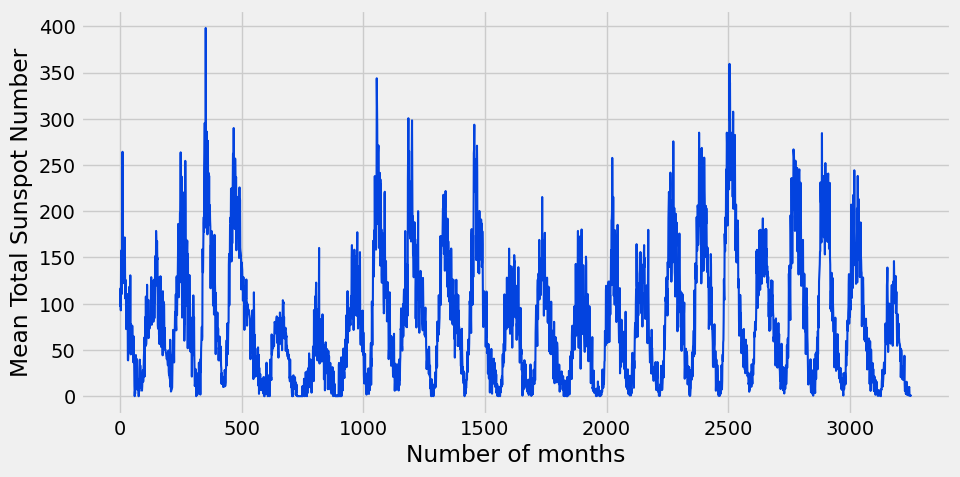

In [8]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))
plt.plot(sunspots_number,linewidth=1.5,color="#0343DF")
plt.xlabel("Number of months")
plt.ylabel("Mean Total Sunspot Number")
plt.grid(True)

3)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler()

In [11]:
sunspots_scaled=scaler.fit_transform(sunspots_number.reshape(-1,1))

In [12]:
sunspots_scaled

array([[0.24284279],
       [0.26192868],
       [0.29306881],
       ...,
       [0.00100452],
       [0.00125565],
       [0.00401808]])

In [13]:
len(sunspots_scaled)

3252

In [14]:
train_size = int(len(sunspots_scaled) * 0.9) #Split into train and test sets (90% train, 10% test)

In [15]:
train_size

2926

In [16]:
train_set=sunspots_scaled[:train_size]

In [17]:
test_set=sunspots_scaled[train_size:]

In [20]:
test_set.shape

(326, 1)

In [21]:
len(test_set)

326

In [22]:
X_train,y_train=[],[]

In [23]:
for i in range(40,len(train_set)):
    X_train.append(train_set[i-40:i]) #0 in the end removes the 3rd dimension
    y_train.append(train_set[i])

In [24]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [25]:
X_train.shape,y_train.shape

((2886, 40, 1), (2886, 1))

In [29]:
X_test,y_test=[],[]

In [30]:
for i in range(40,len(test_set)):
    X_test.append(test_set[i-40:i])
    y_test.append(test_set[i])

In [31]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [32]:
X_test.shape,y_test.shape

((286, 40, 1), (286, 1))

In [36]:
(X_test.shape[2])

1

4)

In [39]:
model = Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],1)), 
    Dense(units=50, kernel_initializer='lecun_normal', activation='selu'),   
    Dense(units=25, kernel_initializer='lecun_normal', activation='selu'), 
    Dense(units=(X_test.shape[2]))
])

In [40]:
model.compile(optimizer=AdamW(), loss='mse', metrics=['mae'])

In [41]:
callback = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [42]:
start=time.time()
history_model = model.fit(
    X_train,y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    callbacks=[callback])
finish=time.time()

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.6544 - mae: 0.5221 - val_loss: 0.0529 - val_mae: 0.1984
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0268 - mae: 0.1263 - val_loss: 0.0432 - val_mae: 0.1760
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0248 - mae: 0.1204 - val_loss: 0.0367 - val_mae: 0.1557
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0249 - mae: 0.1219 - val_loss: 0.0356 - val_mae: 0.1479
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0253 - mae: 0.1232 - val_loss: 0.0362 - val_mae: 0.1481
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0255 - mae: 0.1225 - val_loss: 0.0373 - val_mae: 0.1512


In [43]:
abs(start-finish)

11.67095685005188

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_1                │ (None, 40, 1)               │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 40, 50)              │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 40, 25)              │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 40, 1)               │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,213 (16.46 KB)

 Trainable params: 1,403 (5.48 KB)

 Non-trainable params: 2 (8.00 B)

 Optimizer params: 2,808 (10.97 KB)

In dense layers we have the formula (Number of input features + 1) × (Number of neurons) +1 is for the bias term.
Batch Normalization adds 2 trainable parameters per feature (gamma and beta), and 2 non-trainable parameters(mean and variance).In first Dense we have (1+1)*50=100,in the second (50+1)*25=1275 and in the last (25+1)=26

5)

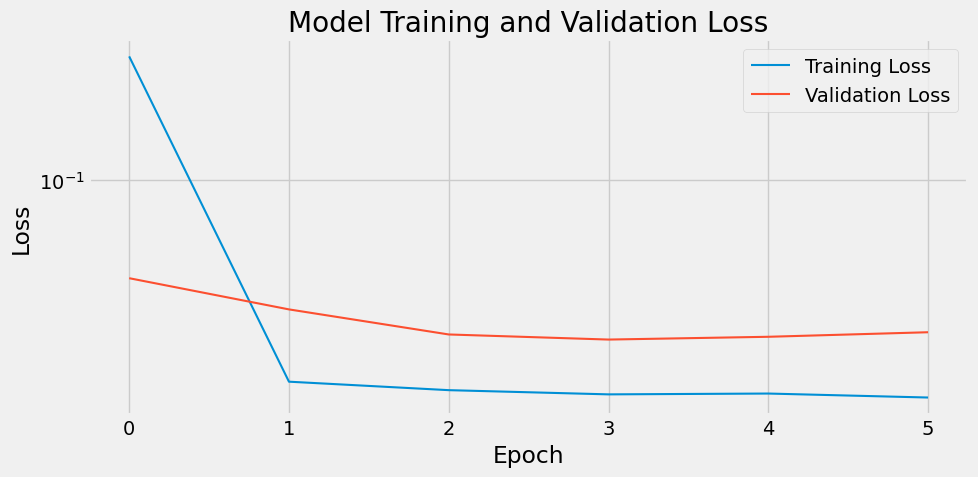

In [45]:
plt.figure(figsize=(10, 5))
plt.semilogy(history_model.history['loss'], label='Training Loss',linewidth=1.5)
plt.semilogy(history_model.history['val_loss'], label='Validation Loss',linewidth=1.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
rmse_training=np.sqrt(pd.DataFrame(history_model.history["loss"]).sum())

In [47]:
rmse_training

0    0.591137
dtype: float64

In [48]:
rmse_validation=np.sqrt(pd.DataFrame(history_model.history["val_loss"]).sum())

In [49]:
rmse_validation

0    0.491827
dtype: float64

In [50]:
mae_training=(pd.DataFrame(history_model.history["mae"]).sum());mae_training

0    0.896414
dtype: float64

In [51]:
mae_validation=(pd.DataFrame(history_model.history["val_mae"]).sum());mae_validation

0    0.977278
dtype: float64

6)

In [52]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step   
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [103]:
test_predictions.shape

(286, 40, 1)

In [53]:
test_predictions.shape,train_predictions.shape

((286, 40, 1), (2886, 40, 1))

In [56]:
test_predictions[:,:,0].shape

(286, 40)

In [60]:
X_test[:,:,0].shape

(286, 40)

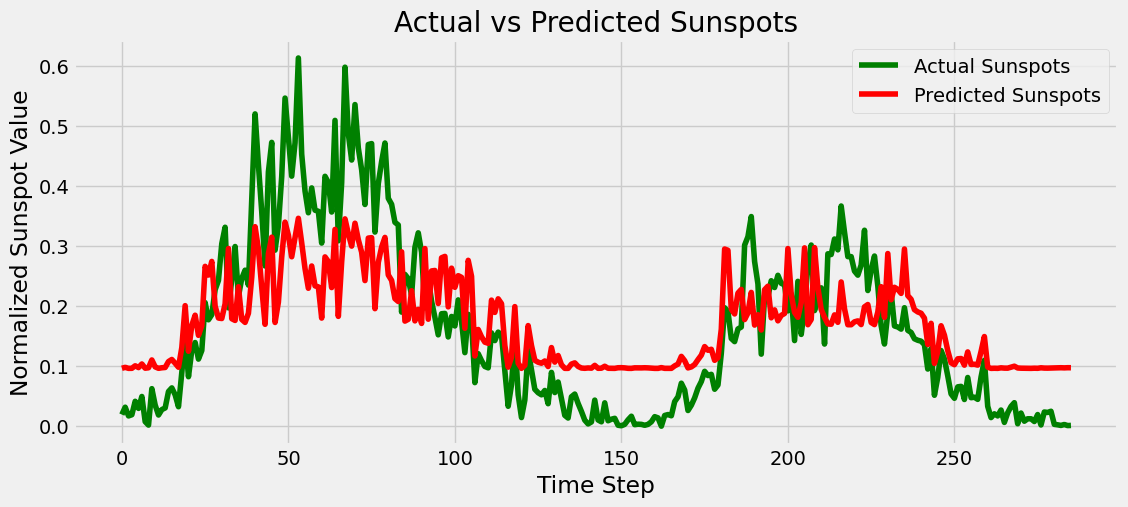

In [119]:
plt.figure(figsize=(12, 5))
plt.plot(X_test[:,-1,:], label='Actual Sunspots',color="green")
plt.plot(test_predictions[:,-1,:], label='Predicted Sunspots',color="red")
plt.title('Actual vs Predicted Sunspots')
plt.xlabel('Time Step')
plt.ylabel('Normalized Sunspot Value')
plt.legend()
plt.grid(True)
plt.show()

7)

In [84]:
from tensorflow.keras.layers import GRU

In [85]:
model_GRU = Sequential([
    BatchNormalization(input_shape=(40,1)), 
    GRU(50, activation='selu', kernel_initializer= "lecun_normal",return_sequences=True),
    GRU(25, activation='selu', kernel_initializer="lecun_normal"),
    Dense(1)
])

In [86]:
model_GRU.compile(optimizer=AdamW(), loss='mse', metrics=['mae'])

In [87]:
callback_GRU = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True,min_delta=0.0005)

In [88]:
start_GRU=time.time()
history_model_GRU = model_GRU.fit(
    X_train,y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    callbacks=[callback])
finish_GRU=time.time()

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0999 - mae: 0.1986 - val_loss: 0.0318 - val_mae: 0.1510
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0071 - mae: 0.0642 - val_loss: 0.0233 - val_mae: 0.1271
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0065 - mae: 0.0609 - val_loss: 0.0061 - val_mae: 0.0602
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0066 - mae: 0.0596 - val_loss: 0.0053 - val_mae: 0.0566
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0058 - mae: 0.0580 - val_loss: 0.0112 - val_mae: 0.0847
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0068 - mae: 0.0624 - val_loss: 0.0083 - val_mae: 0.0738


In [90]:
abs(start_GRU-finish_GRU)

38.95423197746277

In [91]:
model_GRU.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_19               │ (None, 40, 1)               │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_30 (GRU)                         │ (None, 40, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_31 (GRU)                         │ (None, 25)                  │           5,775 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,263 (161.19 KB)

 Trainable params: 13,753 (53.72 KB)

 Non-trainable params: 2 (8.00 B)

 Optimizer params: 27,508 (107.46 KB)

In [105]:
test_predictions_GRU = model_GRU.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 


In [113]:
test_predictions_GRU.shape,X_test[:,-1,0].shape

((286, 1), (286,))

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [108]:
rmse_GRU = np.sqrt(mean_squared_error(y_test, test_predictions_GRU))
mae_GRU = mean_absolute_error(y_test, test_predictions_GRU)

In [109]:
print(f"GRU Sequential Test RMSE: {rmse_GRU:.6f}")
print(f"GRU Sequential Test MAE: {mae_GRU:.6f}")

GRU Sequential Test RMSE: 0.054012
GRU Sequential Test MAE: 0.037508


We have much better results in terms of RMSE and MAE, so using GRU as we can see also from the plot below gives much better results in comaprison with just fully connected layers.

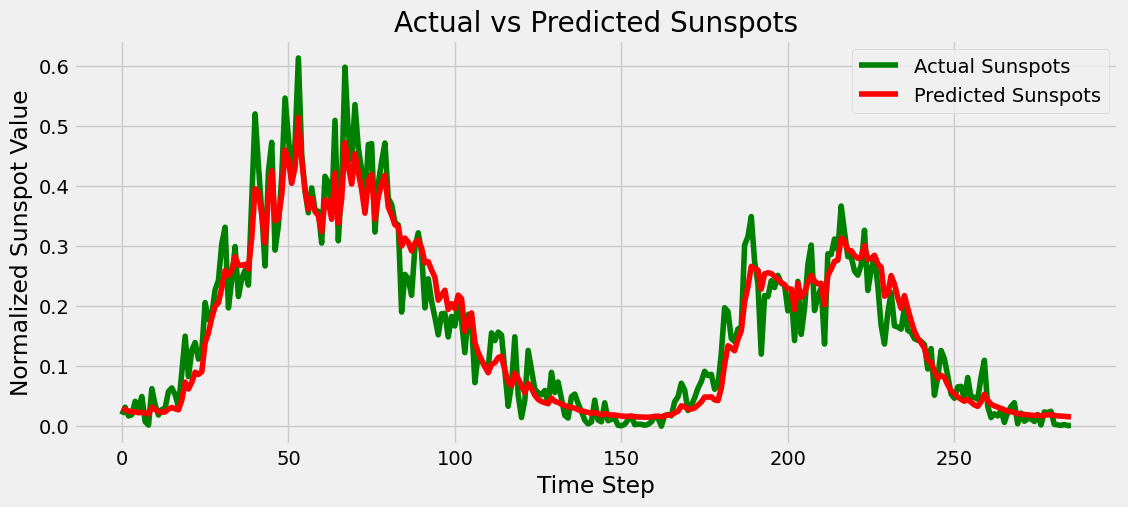

In [120]:
plt.figure(figsize=(12, 5))
plt.plot(X_test[:,-1,:], label='Actual Sunspots',color="green") #we take the last window of the test set to plot with the predictions.
plt.plot(test_predictions_GRU, label='Predicted Sunspots',color="red")
plt.title('Actual vs Predicted Sunspots')
plt.xlabel('Time Step')
plt.ylabel('Normalized Sunspot Value')
plt.legend()
plt.grid(True)
plt.show()